In [2]:
library(BSgenome)
library(tidyverse)

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Warning message:
"package 'S4Vectors' was built under R version 3.6.2"Loading 

In [7]:
setwd("D:/ScientificReports/GeneExpressionIntegration/")

In [8]:
lk_kbase=readGFF('Lk_kbase.gff')
chr_names=unique(lk_kbase$seqid)
lk_kbase_gr=makeGRangesFromDataFrame(lk_kbase,keep.extra.columns = TRUE)

In [9]:
lk_ids=readGFF('Lk_ids.gff.txt')
lk_ids$chrid=chr_names[lk_ids$score]
lk_ids_df=data.frame(chr=lk_ids$chrid,start=lk_ids$type,end=lk_ids$start,ids=lk_ids$seqid)
lk_ids_gr=makeGRangesFromDataFrame(lk_ids_df,keep.extra.columns = TRUE)
lk_ids_gr

GRanges object with 5683 ranges and 1 metadata column:
           seqnames          ranges strand |          ids
              <Rle>       <IRanges>  <Rle> |     <factor>
     [1] CM000687.1       9038-9973      * | SAKL0A00132g
     [2] CM000687.1     13363-15120      * | SAKL0A00154g
     [3] CM000687.1     17318-18049      * | SAKL0A00176g
     [4] CM000687.1     19808-20776      * | SAKL0A00198g
     [5] CM000687.1     20959-22908      * | SAKL0A00220g
     ...        ...             ...    ... .          ...
  [5679] CM000694.1 2300170-2301876      * | SAKL0H26158g
  [5680] CM000694.1 2302425-2303825      * | SAKL0H26180g
  [5681] CM000694.1 2304201-2306150      * | SAKL0H26202g
  [5682] CM000694.1 2308056-2308739      * | SAKL0H26224g
  [5683] CM000694.1 2311294-2312949      * | SAKL0H26246g
  -------
  seqinfo: 8 sequences from an unspecified genome; no seqlengths

In [10]:
m=findOverlaps(lk_ids_gr,lk_kbase_gr)

In [11]:
lk_ids_gr.matched <- lk_ids_gr[queryHits(m)]
mcols(lk_ids_gr.matched) <- cbind.data.frame(mcols(lk_ids_gr.matched),mcols(lk_kbase_gr[subjectHits(m)]))

In [12]:
pcc_ids=lk_ids_gr.matched$ID

In [13]:
sak_ids=as.character(lk_ids_gr.matched$ids)

In [14]:
ids_mapped=cbind(pcc_ids,sak_ids)
ids_mapping <- as_tibble(ids_mapped)

In [15]:
ids_map=ids_mapping[!duplicated(ids_mapping$sak_ids), ]

In [16]:
MapPCSAK=data.frame(ids_map)

In [12]:
write.csv(data.frame(ids_map),'IDMapping.csv')

In [13]:
GeneExpr=read.csv("ExpressionValues.txt",sep='\t')
Mapping=read.csv("MetaFile.txt",sep='\t',header=FALSE)

In [14]:
MapIDSAK=Mapping[,1:2]
colnames(MapIDSAK)=c('IDs','SAKIDs')

In [15]:
mean_expr=data.frame(IDs=GeneExpr[,1],Value=apply(X=GeneExpr[,2:5],MARGIN = 1,FUN=mean))
MapSAK=merge(x=mean_expr,y=MapIDSAK,by='IDs')

In [16]:
MapPC=merge(x=MapSAK,y=MapPCSAK,by.x="SAKIDs",by.y="sak_ids")

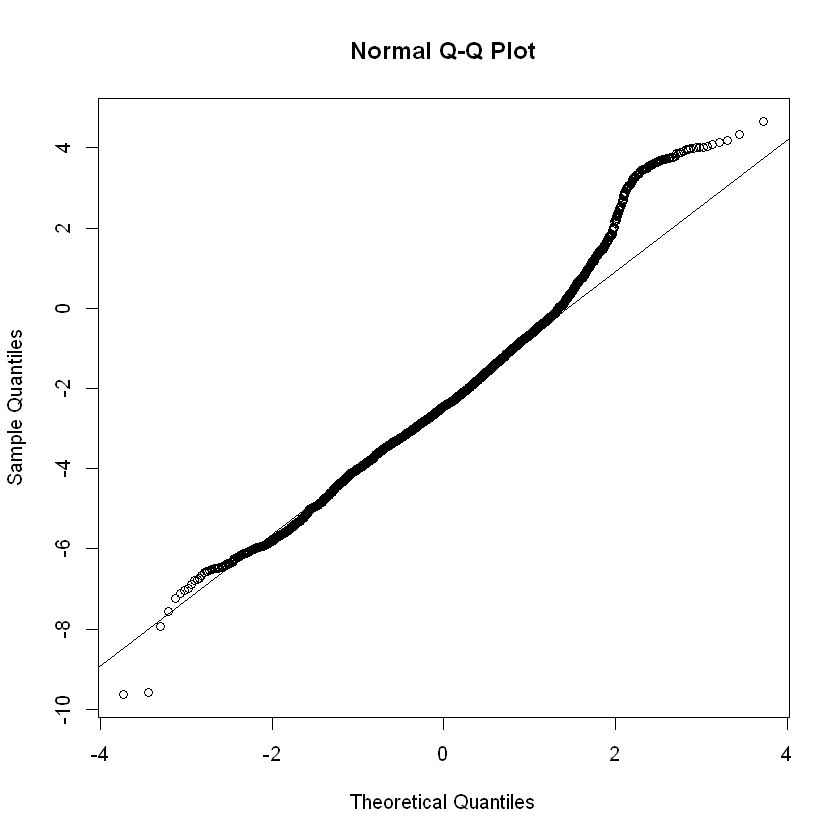

In [17]:
qqnorm(MapPC$Value)
qqline(MapPC$Value)

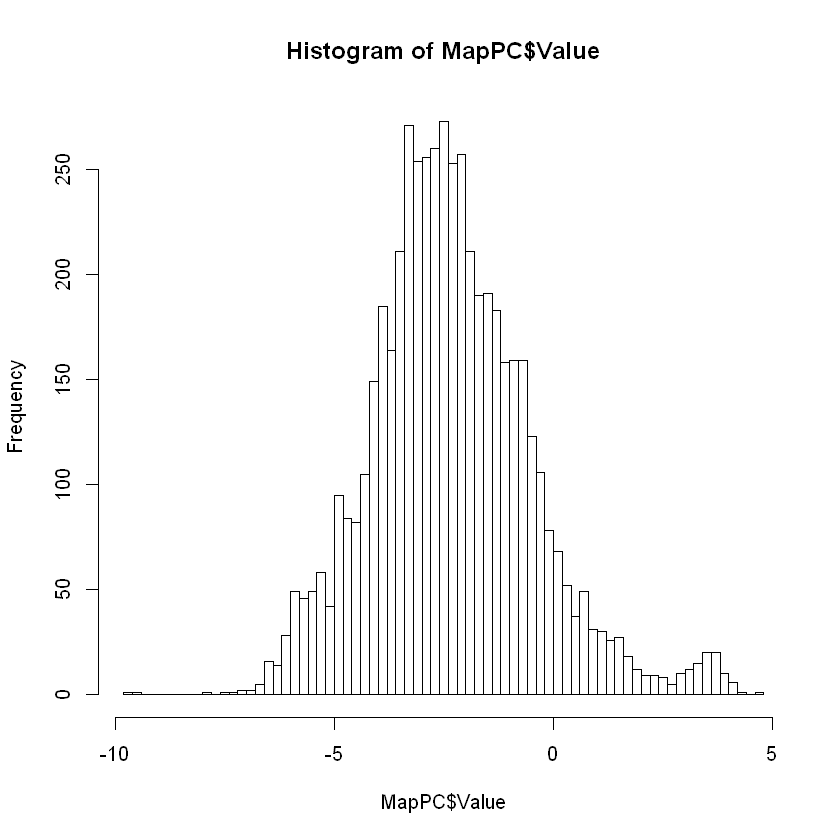

In [18]:
hist(MapPC$Value,100)

In [32]:
MapPC

Condition,SAKIDs,IDs,Value,pcc_ids,highlight
YPD,SAKL0A00132g,11677,-4.1578643,PCCGCIGL_00007,FALSE
YPD,SAKL0A00154g,13177,-6.2429032,PCCGCIGL_00010,FALSE
YPD,SAKL0A00176g,15008,-5.2022015,PCCGCIGL_00012,FALSE
YPD,SAKL0A00198g,15280,-2.8861090,PCCGCIGL_00014,FALSE
YPD,SAKL0A00220g,10806,-0.4136605,PCCGCIGL_00015,FALSE
YPD,SAKL0A00242g,13388,-2.1032871,PCCGCIGL_00017,FALSE
YPD,SAKL0A00264g,12895,-4.0083337,PCCGCIGL_00018,FALSE
YPD,SAKL0A00286g,13317,-3.0215326,PCCGCIGL_00019,FALSE
YPD,SAKL0A00308g,13595,0.4418466,PCCGCIGL_00022,FALSE
YPD,SAKL0A00330g,14100,-3.6088208,PCCGCIGL_00024,FALSE


In [21]:
write.csv(MapPC,"NormalizedAbsoluteExpression.csv")